# KorIM

Some samples of what KorIM can do

In [2]:
@file:DependsOn("com.soywiz.korlibs.korio:korio-jvm:2.4.6")
@file:DependsOn("com.soywiz.korlibs.korim:korim-jvm:2.4.6")

In [12]:
import com.soywiz.korma.*
import com.soywiz.korma.geom.*
import com.soywiz.korma.geom.vector.*
import com.soywiz.korim.*
import com.soywiz.korio.*
import com.soywiz.korio.file.*
import com.soywiz.korio.file.std.*
import com.soywiz.korim.*
import com.soywiz.korim.format.*
import com.soywiz.korim.vector.*
import com.soywiz.korim.vector.format.*
import com.soywiz.korim.bitmap.*
import com.soywiz.korim.color.*
import com.soywiz.korim.awt.*
import kotlinx.coroutines.*

## Vector rendering

KorIM supports vector rendering with a Canvas-Context2D-like API


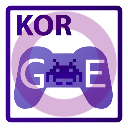

In [5]:
val bitmap = runBlocking { localCurrentDirVfs["korge.png"].readBitmapNoNative(PNG) }

NativeImage(128, 128).context2d {
    drawImage(bitmap, 0, 0, 128, 128)
    fill(Colors.PURPLE.withAd(0.3)) {
        translate(64, 64)
        scale(1.1)
        circle(0, 0, 48)
        circle(0, 0, 32)
    }
}.toAwt()

## Generating an atlas from an animated image format

ASE files support animations, you can load the image and generate an atlas from it.


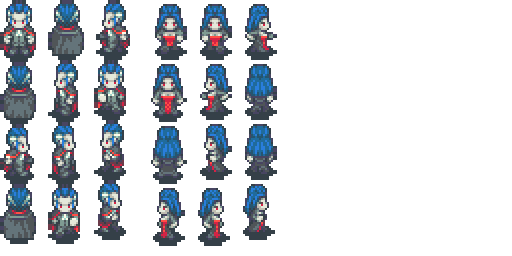

In [6]:
import com.soywiz.korim.atlas.*

val atlas = MutableAtlasUnit(512, 256)
val bitmap = runBlocking { localCurrentDirVfs["characters.ase"].readImageDataContainer(ASE, atlas = atlas) }
atlas.bitmap.toAwt()

In [ ]:
You can access the structured image animation to get individual frames


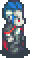

In [7]:
bitmap.imageDatasByName["vampire"]!!.animationsByName["right"]!!.frames[1].slice.extract().toAwt()


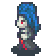

In [8]:
bitmap.imageDatasByName["vamp"]!!.animationsByName["left"]!!.frames[2].slice.extract().toAwt()

## Rasterize a SVG image

KorIM supports SVG rasterization


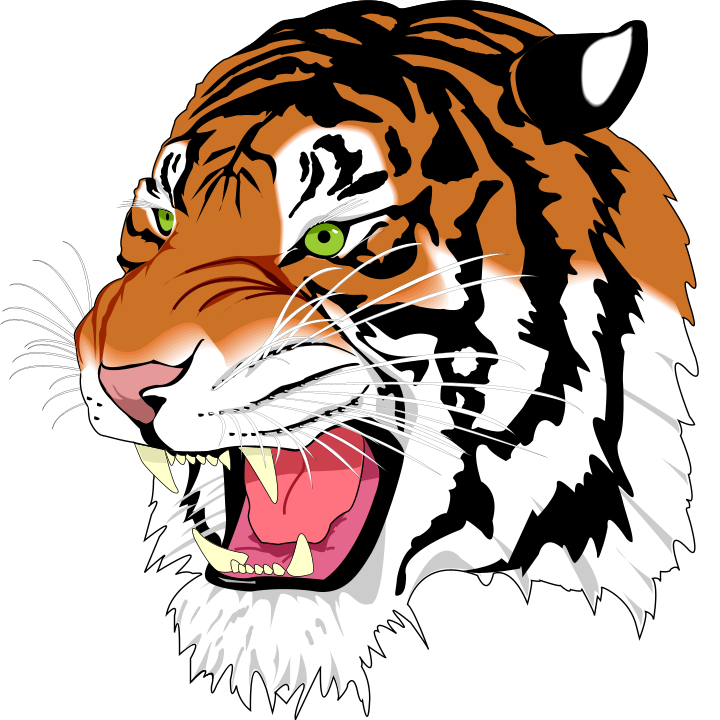

In [13]:
val tigerSvg = runBlocking { localCurrentDirVfs["tiger.svg"].readString() }
val svg = com.soywiz.korim.vector.format.SVG(tigerSvg)
svg.scaled(0.8, 0.8).render().toAwt()

## Output untransformed SVG

It is possible to load an SVG, then output HTML in this notebook with the `HTML` function.

In [16]:
val tigerSvg = runBlocking { localCurrentDirVfs["tiger.svg"].readString() }
HTML("$tigerSvg")

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path id="path56" d="m-129.83,103.06c0.5,6.05,1.49,12.62,3.23,15.74,0,0-3.6,12.4,5.2,25.6,0,0-0.4,7.2,1.2,10.4,0,0,4,8.4,8.8,9.2,3.88,0.65,12.607,3.72,22.468,5.12,0,0,17.132,14.08,13.932,26.88,0,0-0.4,16.4-4,18,0,0,11.6-11.2,2,5.6l-4.4,18.8s25.6-21.6,10-3.2l-10,26s19.6-18.4,12.4-10l-3.2,8.8s43.2-27.2,12.4,2.4c0,0,8-3.6,12.4-0.8,0,0,6.8-1.2,6,0.4,0,0-20.8,10.4-24.4,28.8,0,0,8.4-10,5.2,0.8l0.4,11.6s4-21.6,3.6,16c0,0,19.2-18,7.6,2.8v16.8s15.2-16.4,8.8-3.6c0,0,10-8.8,6,6.4,0,0-0.8,10.4,3.6-0.8,0,0,16-30.6,10-4.4,0,0-0.8,19.2,4,4.4,0,0,0.4,10.4,9.6,17.6,0,0-1.2-50.8,11.6-14.8l4,16.4s2.8-9.2,2.4-14.4l8,8s15.2-22.8,12-9.6c0,0-7.6,16-6,20.8,0,0,16.8-34.8,18-36.4,0,0-2,42.4,8.8,6.4,0,0,5.6,12,2.8,16.4,0,0,8-8,7.2-11.2,0,0,4.6-8.2,7.4,5.4,0,0,1.8,9.4,3.4,6.2,0,0,4,24,5.2,1.2,0,0,1.6-13.6-5.6-25.2,0,0,0.8-3.2-2-7.2,0,0,13.6,21.6,6.4-7.2,0,0,11.201,8,12.401,8,0,0-13.601-23.2-4.801-18.4,0,0-5.2-10.4,12.801,1.6,0,0-16.001-16,1.6-6.4,0,0,7.999,6.4,0.4-3.6,0,0-14.401-16,7.599,2,0,0,11.6,16.4,12.4,19.2,0,0-10-29.2-14.4-32,0,0,8.4-36.4,49.6-20.8,0,0,6.8,17.2,11.2-1.2,0,0,12.8-6.4,24,21.2,0,0,4-13.6,3.2-16.4,0,0,6.8,1.2,6,0,0,0,13.2,4.4,14.4,3.6,0,0,6.8,6.8,7.2,3.2,0,0,9.2,2.8,7.2-0.8,0,0,8.8,15.6,9.2,19.2l2.4-14,2,2.8s1.6-7.6,0.8-8.8,20,6.8,24.8,27.6l2,8.4s6-14.8,4.4-18.8c0,0,5.2,0.8,5.6,5.2,0,0,4-23.2-0.8-29.2,0,0,4.4-0.8,5.6,2.8v-7.2s7.2,0.8,7.2-1.6c0,0,4.4-4,6.4,0.8,0,0-12.4-35.2,6-16,0,0,7.2,10.8,3.6-8s-7.6-20.4-2.8-20.8c0,0,0.8-3.6-1.2-5.2s1.2,0,1.2,0,4.8,4-0.4-18c0,0,6.4,1.6-5.6-27.6,0,0,2.8-2.4-1.2-10.8,0,0,8,4.4,10.8,2.8,0,0-0.4-1.6-3.6-5.6,0,0-21.6-54.8-1.2-32.8,0,0,11.85,13.55,5.45-9.25,0,0-9.11-24.009-8.33-28.305l-429.55,23.015z"/>
 
 
 <path id="path60" d="m299.72,80.245c0.62,0.181,2.83,1.305,4.08,2.955,0,0,6.8,10.8,1.6-7.6,0,0-9.2-28.8-0.4-17.6,0,0,6,7.2,2.8-6.4-3.86-16.427-6.4-22.8-6.4-22.8s11.6,4.8-15.2-34.8l8.8,3.6s-19.6-39.6-41.2-44.8l-8-6s38.4-38,25.6-74.8c0,0-6.8-5.2-16.4,4,0,0-6.4,4.8-12.4,3.2,0,0-30.8,1.2-32.8,1.2s-36.8-37.2-102.4-19.6c0,0-5.2,2-9.599,0.8,0,0-18.401-16-67.201,6.8,0,0-10,2-11.6,2s-4.4,0-12.4,6.4-8.4,7.2-10.4,8.8c0,0-16.4,11.2-21.2,12,0,0-11.6,6.4-16,16.4l-3.6,1.2s-1.6,7.2-2,8.4c0,0-4.8,3.6-5.6,9.2,0,0-8.8,6-8.4,10.4,0,0-1.6,5.2-2.4,10,0,0-7.2,4.8-6.4,7.6,0,0-7.6,14-6.4,20.8,0,0-6.4-0.4-9.2,2,0,0-0.8,4.8-2.4,5.2,0,0-2.8,1.2-0.4,5.2,0,0-1.6,2.8-2,4.4,0,0,0.8,2.8-3.6,8.4,0,0-6.4,18.8-4.4,24,0,0,0.4,4.8-2.4,6.4,0,0-3.6-0.4,4.8,11.6,0,0,0.8,1.2-2.4,3.6,0,0-17.2,3.6-19.6,20,0,0-13.6,14.8-13.6,20,0,2.305,0.27,5.452,0.97,10.06,0,0-0.57,8.34,27.03,9.14s402.72-31.355,402.72-31.355z"/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path id="path356" d="m14.595,46.349c-0.497-1.742,0.814-1.611,2.605-2.149,2-0.6,14.2-4.4,15-7s14,1.8,14,1.8c1.8,0.8,6.2,3.4,6.2,3.4,4.8,1.2,11.4,1.6,11.4,1.6,2.4,1,5.8,3.8,5.8,3.8,14.6,10.2,27.001,3,27.001,3,19.999-6.6,13.999-23.8,13.999-23.8-3-9,0.2-12.4,0.2-12.4,0.2-3.8,7.4,2.6,7.4,2.6,2.6,4.2,3.4,9.2,3.4,9.2,8,11.2,4.6-6.6,4.6-6.6,0.2-1-2.6-4.6-2.6-5.8s-1.8-4.6-1.8-4.6c-3-3.4-0.6-10.4-0.6-10.4,1.8-13.8-0.4-12-0.4-12-1.2-1.8-10.4,8.2-10.4,8.2-2.2,3.4-8.2,5-8.2,5-2.799,1.8-6.199,0.4-6.199,0.4-2.6-0.4-8.2,6.6-8.2,6.6,2.8-0.2,5.2,4.2,7.6,4.4s4.2-2.4,5.799-3c1.6-0.6,4.4,5.2,4.4,5.2,0.4,2.6-5.2,7.4-5.2,7.4-0.4,4.6-1.999,3-1.999,3-3-0.6-4.2,3.2-5.2,7.8s-5.2,5-5.2,5c-1.6,7.4-2.801,4.4-2.801,4.4-0.2-5.6-6.2,0.2-6.2,0.2-1.2,2-5.8-0.2-5.8-0.2-6.8-2-4.4-4-4.4-4,1.8-2.2,13,0,13,0,2.2-1.6-5.8-5.6-5.8-5.6-0.6-1.8,0.4-6.2,0.4-6.2,1.2-3.2,8-8.8,8-8.8,9.401-1.2,6.601-2.8,6.601-2.8-6.2-5

## Output transformed SVG

It is possible to load an SVG, then transform it and output it again as a SVG.

In [17]:
val tigerSvg = runBlocking { localCurrentDirVfs["tiger.svg"].readString() }
val svg = com.soywiz.korim.vector.format.SVG(tigerSvg)
HTML(svg.scaled(0.4, 0.4).toSvg().toString())

<path d="M129.9 102M38.2 174.7C38.6 179, 39.3 183.7, 40.5 185.9C40.5 185.9, 38 194.6, 44.2 203.9C44.2 203.9, 43.9 209, 45 211.3C45 211.3, 47.8 217.2, 51.2 217.8C54 218.2, 60.1 220.4, 67.1 221.4C67.1 221.4, 79.2 231.3, 76.9 240.4C76.9 240.4, 76.7 252, 74.1 253.1C74.1 253.1, 82.3 245.2, 75.5 257L72.4 270.3C72.4 270.3, 90.5 255.1, 79.5 268.1L72.4 286.4C72.4 286.4, 86.3 273.4, 81.2 279.4L78.9 285.6C78.9 285.6, 109.4 266.4, 87.7 287.3C87.7 287.3, 93.3 284.7, 96.4 286.7C96.4 286.7, 101.2 285.9, 100.7 287C100.7 287, 86 294.3, 83.4 307.3C83.4 307.3, 89.4 300.3, 87.1 307.9L87.4 316.1C87.4 316.1, 90.2 300.8, 89.9 327.4C89.9 327.4, 103.5 314.7, 95.3 329.4L95.3 341.2C95.3 341.2, 106 329.7, 101.5 338.7C101.5 338.7, 108.6 332.5, 105.8 343.2C105.8 343.2, 105.2 350.6, 108.3 342.6C108.3 342.6, 119.6 321, 115.4 339.5C115.4 339.5, 114.8 353.1, 118.2 342.6C118.2 342.6, 118.5 350, 125 355.1C125 355.1, 124.1 319.2, 133.2 344.6L136 356.2C136 356.2, 138 349.7, 137.7 346L143.3 351.7C143.3 351.7, 154.1 335.6, 151.8 344.9C151.8 344.9, 146.4 356.2, 147.6 359.6C147.6 359.6, 159.4 335, 160.3 333.9C160.3 333.9, 158.9 363.8, 166.5 338.4C166.5 338.4, 170.5 346.9, 168.5 350C168.5 350, 174.1 344.3, 173.6 342.1C173.6 342.1, 176.8 336.3, 178.8 345.9C178.8 345.9, 180.1 352.5, 181.2 350.3C181.2 350.3, 184 367.2, 184.9 351.1C184.9 351.1, 186 341.5, 180.9 333.3C180.9 333.3, 181.5 331.1, 179.5 328.2C179.5 328.2, 189.1 343.5, 184 323.2C184 323.2, 191.9 328.8, 192.8 328.8C192.8 328.8, 183.2 312.4, 189.4 315.8C189.4 315.8, 185.7 308.5, 198.4 316.9C198.4 316.9, 187.1 305.6, 199.6 312.4C199.6 312.4, 205.2 316.9, 199.8 309.9C199.8 309.9, 189.7 298.6, 205.2 311.3C205.2 311.3, 213.4 322.9, 214 324.8C214 324.8, 206.9 304.2, 203.8 302.2C203.8 302.2, 209.7 276.5, 238.8 287.6C238.8 287.6, 243.6 299.7, 246.7 286.7C246.7 286.7, 255.8 282.2, 263.7 301.7C263.7 301.7, 266.5 292.1, 265.9 290.1C265.9 290.1, 270.7 290.9, 270.2 290.1C270.2 290.1, 279.5 293.2, 280.3 292.6C280.3 292.6, 285.1 297.4, 285.4 294.9C285.4 294.9, 291.9 296.9, 290.5 294.3C290.5 294.3, 296.7 305.4, 297 307.9L298.7 298L300.1 300C300.1 300, 301.3 294.6, 300.7 293.8C300.1 292.9, 314.8 298.6, 318.2 313.3L319.6 319.2C319.6 319.2, 323.9 308.7, 322.7 305.9C322.7 305.9, 326.4 306.5, 326.7 309.6C326.7 309.6, 329.5 293.2, 326.1 289C326.1 289, 329.2 288.4, 330.1 290.9L330.1 285.9C330.1 285.9, 335.2 286.4, 335.2 284.7C335.2 284.7, 338.3 281.9, 339.7 285.3C339.7 285.3, 330.9 260.4, 343.9 274C343.9 274, 349 281.6, 346.5 268.3C343.9 255.1, 341.1 253.9, 344.5 253.7C344.5 253.7, 345 251.1, 343.6 250C342.2 248.9, 344.5 250, 344.5 250C344.5 250, 347.9 252.8, 344.2 237.3C344.2 237.3, 348.7 238.4, 340.2 217.8C340.2 217.8, 342.2 216.1, 339.4 210.2C339.4 210.2, 345 213.3, 347 212.1C347 212.1, 346.7 211, 344.5 208.2C344.5 208.2, 329.2 169.5, 343.6 185C343.6 185, 352 194.6, 347.5 178.5C347.5 178.5, 341 161.5, 341.6 158.5L38.2 174.7Z" transform="translate(129.962864, 102.00376800000001) scale(0.70625852, 0.70625852)" fill="rgba(255,255,255,1)"/><path d="M129.9 102M38.2 174.7C38.6 179, 39.3 183.7, 40.5 185.9C40.5 185.9, 38 194.6, 44.2 203.9C44.2 203.9, 43.9 209, 45 211.3C45 211.3, 47.8 217.2, 51.2 217.8C54 218.2, 60.1 220.4, 67.1 221.4C67.1 221.4, 79.2 231.3, 76.9 240.4C76.9 240.4, 76.7 252, 74.1 253.1C74.1 253.1, 82.3 245.2, 75.5 257L72.4 270.3C72.4 270.3, 90.5 255.1, 79.5 268.1L72.4 286.4C72.4 286.4, 86.3 273.4, 81.2 279.4L78.9 285.6C78.9 285.6, 109.4 266.4, 87.7 287.3C87.7 287.3, 93.3 284.7, 96.4 286.7C96.4 286.7, 101.2 285.9, 100.7 287C100.7 287, 86 294.3, 83.4 307.3C83.4 307.3, 89.4 300.3, 87.1 307.9L87.4 316.1C87.4 316.1, 90.2 300.8, 89.9 327.4C89.9 327.4, 103.5 314.7, 95.3 329.4L95.3 341.2C95.3 341.2, 106 329.7, 101.5 338.7C101.5 338.7, 108.6 332.5, 105.8 343.2C105.8 343.2, 105.2 350.6, 108.3 342.6C108.3 342.6, 119.6 321, 115.4 339.5C115.4 339.5, 114.8 353.1, 118.2 342.6C118.2 342.6, 118.5 350, 125 355.1C125 355.1, 124.1 319.2, 133.2 344.6L136 356.2C136 356.2, 138 349.7, 137.7 346L143.3 351.7C143.3 351.7, 154.1 335.6, 151.8 344.9C151.8

We can also use `buildShape` to build a vector and generate a SVG from it

In [18]:
val shape = buildShape(128, 128) {
    fill(Colors.BLUE.withAd(1.0)) {
        moveTo(10, 10)
        lineTo(80, 10)
        lineTo(70, 80)
        lineTo(20, 80)
        close()
    }
    fill(Colors.RED.withAd(0.5)) {
        translate(23, 23)
        star(5, 10.0, 20.0)
    }
}

HTML(shape.toSvg().toString())